# Conversión de categóricas a numéricas

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import root_mean_squared_error # ?????


In [2]:
import sys, os
sys.path.append(os.getcwd().replace('/notebooks',''))  # Replace with current directory name

In [3]:
from utils.data import Datasets
from utils.eda import column_explore

In [4]:
ds = Datasets()
cash, fees = ds.get_datasets()
cash = ds.desglose_created_at(cash)

In [5]:
cash.columns

Index(['cash_request_id', 'amount', 'status', 'created_at', 'updated_at',
       'user_id', 'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update',
       'id_usuario', 'created_year', 'created_month', 'created_year_month',
       'created_dayofweek', 'created_hour'],
      dtype='object')

In [6]:
fees.columns

Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment'],
      dtype='object')

In [7]:
subset_cash=['cash_request_id','amount','status','transfer_type','recovery_status','id_usuario','created_year_month','created_at']
cash_ss = cash[subset_cash]
cash_ss

,cash_request_id,amount,status,transfer_type,recovery_status,id_usuario,created_year_month,created_at
0,5,100.0,rejected,regular,NaN,804,2019-12,2019-12-10 19:05:21.596873+00:00
1,70,100.0,rejected,regular,NaN,231,2019-12,2019-12-10 19:50:12.347780+00:00
2,7,100.0,rejected,regular,NaN,191,2019-12,2019-12-10 19:13:35.825460+00:00
3,10,99.0,rejected,regular,NaN,761,2019-12,2019-12-10 19:16:10.880172+00:00
4,1594,100.0,rejected,regular,NaN,7686,2020-5,2020-05-06 09:59:38.877376+00:00
...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,instant,NaN,13681,2020-10,2020-10-12 13:54:11.686225+00:00
23966,25243,50.0,money_back,instant,completed,30367,2020-10,2020-10-27 14:41:25.734910+00:00
23967,22357,100.0,money_back,instant,NaN,82122,2020-10,2020-10-20 07:58:04.006937+00:00
23968,20256,100.0,money_back,instant,NaN,64517,2020-10,2020-10-10 05:40:55.700422+00:00


In [8]:
subset_fees=['id','cash_request_id','type', 'status', 'category', 'total_amount','charge_moment']
fees_ss = fees[subset_fees]
fees_ss

,id,cash_request_id,type,status,category,total_amount,charge_moment
0,6537,14941,instant_payment,rejected,NaN,5.0,after
1,6961,11714,incident,accepted,rejected_direct_debit,5.0,after
2,16296,23371,instant_payment,accepted,NaN,5.0,after
3,20775,26772,instant_payment,accepted,NaN,5.0,after
4,11242,19350,instant_payment,accepted,NaN,5.0,after
...,...,...,...,...,...,...,...
21056,12372,20262,instant_payment,rejected,NaN,5.0,after
21057,20768,26764,instant_payment,rejected,NaN,5.0,after
21058,18779,25331,instant_payment,rejected,NaN,5.0,after
21059,16542,23628,instant_payment,rejected,NaN,5.0,after


In [9]:
merged = pd.merge(cash_ss, fees_ss.add_prefix('fee_'), left_on='cash_request_id', right_on='fee_cash_request_id', how='outer') # 32098 rows

In [10]:
top100 = merged[merged['status']=='money_back'].groupby('id_usuario').agg(
    amount_fees=('fee_total_amount','sum'))
top100_usrs = top100.sort_values(by='amount_fees', ascending=False).iloc[:100].index
top100_usrs

Index([16391.0,  7731.0, 15593.0, 17144.0,  3045.0, 23823.0,   528.0, 13607.0,
       21934.0, 11648.0, 20447.0, 14583.0,  8649.0, 13404.0, 21706.0, 14375.0,
       20871.0, 34243.0, 23661.0, 14953.0, 19730.0,  4636.0, 10173.0,  2562.0,
       50026.0, 33993.0, 33181.0,  7210.0, 21035.0,   421.0, 28932.0, 14443.0,
       52530.0, 41679.0, 21453.0, 19333.0,  9854.0,  5267.0,  7445.0, 25464.0,
       89394.0, 14218.0, 37862.0, 10530.0,   526.0, 15716.0, 14892.0, 24288.0,
       18984.0, 11201.0, 19055.0, 19257.0,  4954.0, 12934.0, 16459.0, 18787.0,
       12888.0, 29205.0, 18464.0, 18006.0, 14419.0,   235.0, 27401.0, 14304.0,
       33889.0, 24590.0, 15536.0, 30956.0,  1017.0, 16864.0,  2548.0, 27117.0,
       27005.0, 26342.0,  2012.0, 16521.0,    47.0, 22623.0, 11557.0,  8341.0,
        8496.0, 40138.0,  6207.0,  5230.0,  6916.0, 36054.0, 53083.0, 35753.0,
        4916.0, 39068.0, 11939.0, 13045.0, 12724.0, 26653.0, 20421.0, 35374.0,
       17089.0, 24724.0, 17531.0, 19986.0],
      dt

In [11]:
# Beneficio por cliente
metricas_usuario = merged[merged['id_usuario'].isin(top100_usrs)].groupby(['created_year_month','id_usuario','status','fee_charge_moment']).agg(
    num_peticiones=('cash_request_id', 'count'),
    amount=('amount', 'sum'),
    num_fees=('fee_id','count'),
    amount_fees=('fee_total_amount','sum'))
metricas_usuario

num_peticiones  \
created_year_month id_usuario status     fee_charge_moment                   
2020-10            47.0       money_back after                           2   
                   235.0      money_back after                           1   
                   421.0      money_back before                          1   
                   526.0      money_back after                           2   
                                         before                          1   
...                                                                    ...   
2020-9             41679.0    money_back after                           9   
                                         before                          1   
                   50026.0    money_back after                          14   
                   52530.0    money_back after                           2   
                   53083.0    money_back after                           1   

                                                            amount  num_fees  \
created_year_month id_usuario status     fee_charge_moment                     
2020-10            47.0       money_back after                 6.0         2   
                   235.0      money_back after               100.0         1   
                   421.0      money_back before               50.0         1   
                   526.0      money_back after               190.0         2   
                                         before               90.0         1   
...                                                            ...       ...   
2020-9             41679.0    money_back after               900.0         9   
                                         before              100.0         1   
                   50026.0    money_back after              1400.0        14   
                   52530.0    money_back after               200.0         2   
                   53083.0    money_back after               100.0         1   

                                                            amount_fees  
created_year_month id_usuario status     fee_charge_moment               
2020-10            47.0       money_back after                     10.0  
                   235.0      money_back after                      5.0  
                   421.0      money_back before                     5.0  
                   526.0      money_back after                     10.0  
                                         before                     5.0  
...                                                                 ...  
2020-9             41679.0    money_back after                     45.0  
                                         before                     5.0  
                   50026.0    money_back after                     70.0  
                   52530.0    money_back after                     10.0  
                   53083.0    money_back after                      5.0  

[348 rows x 4 columns]

## Regresión

In [12]:
df = metricas_usuario.reset_index()
df

,created_year_month,id_usuario,status,fee_charge_moment,num_peticiones,amount,num_fees,amount_fees
0,2020-10,47.0,money_back,after,2,6.0,2,10.0
1,2020-10,235.0,money_back,after,1,100.0,1,5.0
2,2020-10,421.0,money_back,before,1,50.0,1,5.0
3,2020-10,526.0,money_back,after,2,190.0,2,10.0
4,2020-10,526.0,money_back,before,1,90.0,1,5.0
...,...,...,...,...,...,...,...,...
343,2020-9,41679.0,money_back,after,9,900.0,9,45.0
344,2020-9,41679.0,money_back,before,1,100.0,1,5.0
345,2020-9,50026.0,money_back,after,14,1400.0,14,70.0
346,2020-9,52530.0,money_back,after,2,200.0,2,10.0


In [13]:
df.created_year_month.value_counts().sort_index()

created_year_month
2020-10    75
2020-5      9
2020-6     59
2020-7     47
2020-8     90
2020-9     68
Name: count, dtype: int64

In [14]:
df = ds.get_dummies_and_drop_cols(df, '', 'fee_charge_moment')
df

,created_year_month,id_usuario,status,num_peticiones,amount,num_fees,amount_fees,fee_charge_moment_before
0,2020-10,47.0,money_back,2,6.0,2,10.0,0
1,2020-10,235.0,money_back,1,100.0,1,5.0,0
2,2020-10,421.0,money_back,1,50.0,1,5.0,1
3,2020-10,526.0,money_back,2,190.0,2,10.0,0
4,2020-10,526.0,money_back,1,90.0,1,5.0,1
...,...,...,...,...,...,...,...,...
343,2020-9,41679.0,money_back,9,900.0,9,45.0,0
344,2020-9,41679.0,money_back,1,100.0,1,5.0,1
345,2020-9,50026.0,money_back,14,1400.0,14,70.0,0
346,2020-9,52530.0,money_back,2,200.0,2,10.0,0


In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['created_year_month_dummy'] = labelencoder.fit_transform(df['created_year_month']) 
df      

,created_year_month,id_usuario,status,num_peticiones,amount,num_fees,amount_fees,fee_charge_moment_before,created_year_month_dummy
0,2020-10,47.0,money_back,2,6.0,2,10.0,0,0
1,2020-10,235.0,money_back,1,100.0,1,5.0,0,0
2,2020-10,421.0,money_back,1,50.0,1,5.0,1,0
3,2020-10,526.0,money_back,2,190.0,2,10.0,0,0
4,2020-10,526.0,money_back,1,90.0,1,5.0,1,0
...,...,...,...,...,...,...,...,...,...
343,2020-9,41679.0,money_back,9,900.0,9,45.0,0,5
344,2020-9,41679.0,money_back,1,100.0,1,5.0,1,5
345,2020-9,50026.0,money_back,14,1400.0,14,70.0,0,5
346,2020-9,52530.0,money_back,2,200.0,2,10.0,0,5


In [16]:
df.drop(columns=['num_peticiones','num_fees'], inplace=True)

In [17]:
df_previous = pd.DataFrame(df[df['created_year_month']!='2020-10'])
df_previous.drop(columns=['created_year_month', 'id_usuario', 'status'], inplace=True)
df_previous

,amount,amount_fees,fee_charge_moment_before,created_year_month_dummy
75,50.0,25.0,1,1
76,1200.0,60.0,0,1
77,1000.0,50.0,0,1
78,200.0,10.0,1,1
79,50.0,5.0,0,1
...,...,...,...,...
343,900.0,45.0,0,5
344,100.0,5.0,1,5
345,1400.0,70.0,0,5
346,200.0,10.0,0,5


In [18]:
df_last = pd.DataFrame(df[df['created_year_month']=='2020-10'])
df_last.drop(columns=['created_year_month', 'id_usuario', 'status'], inplace=True)
df_last

,amount,amount_fees,fee_charge_moment_before,created_year_month_dummy
0,6.0,10.0,0,0
1,100.0,5.0,0,0
2,50.0,5.0,1,0
3,190.0,10.0,0,0
4,90.0,5.0,1,0
...,...,...,...,...
70,100.0,5.0,0,0
71,1000.0,50.0,1,0
72,900.0,45.0,1,0
73,100.0,5.0,0,0


<Axes: >

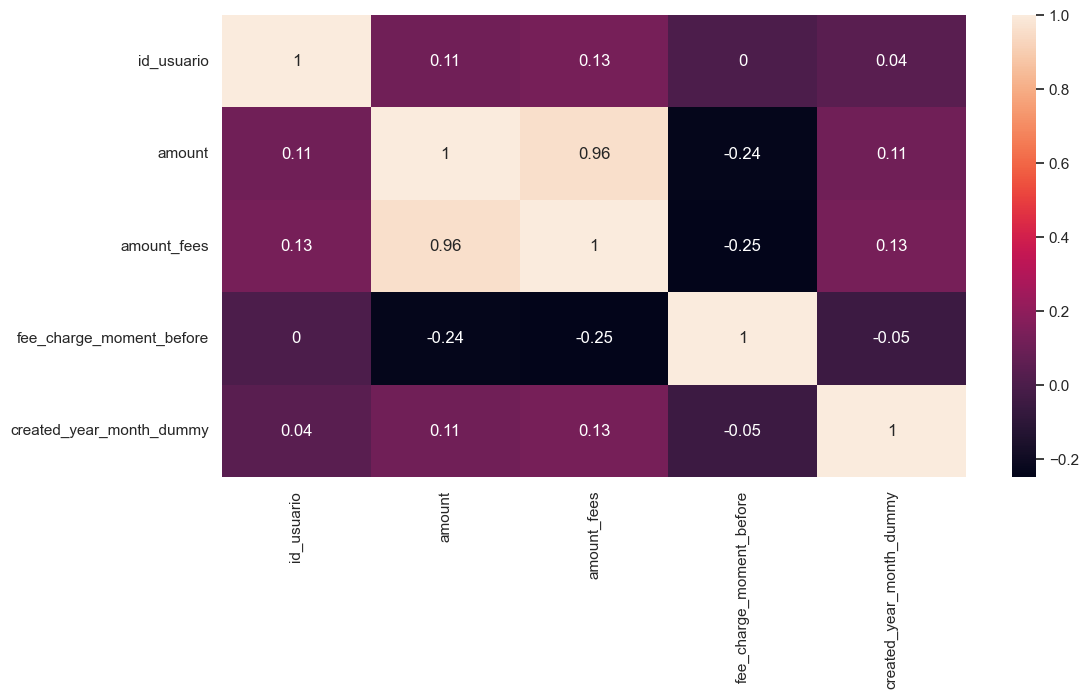

In [19]:
numericals = df.select_dtypes(np.number)
corr = numericals.corr()
import seaborn as sns
sns.set_context("poster") # Set the Seaborn context to "poster" for larger text and figures
sns.set(rc={"figure.figsize": (12., 6.)}) # Set the default figure size for Seaborn plots
sns.set_style("whitegrid") # Set the Seaborn style to "whitegrid" for a white background with gridlines

sns.heatmap(corr.round(2), annot=True)

In [20]:
X=df_previous.drop(columns='amount_fees')
y=df_previous['amount_fees']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None, random_state=42)

# Entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

# Sobrescribir conjuntos de prueba X_test y y_test con los valores de nuestro 3r mes
X_test = df_last.drop(columns='amount_fees')
y_test = df_last['amount_fees']

y_test_pred = model.predict(X_test)

# Evaluar el Modelo
print('-- Train -----')
mse = mean_squared_error(y_train, y_train_pred)
print(f"Error cuadrático medio (MSE) del modelo: {mse:.4f}")
r2 = r2_score(y_train, y_train_pred)
print(f"Valor R² del modelo: {r2:.4f}")
print()

print('-- Test -----')
mse = mean_squared_error(y_test, y_test_pred)
print(f"Error cuadrático medio (MSE) del modelo: {mse:.4f}")
r2 = r2_score(y_test, y_test_pred)
print(f"Valor R² del modelo: {r2:.4f}")
print()


-- Train -----
Error cuadrático medio (MSE) del modelo: 34.3624
Valor R² del modelo: 0.9358

-- Test -----
Error cuadrático medio (MSE) del modelo: 21.4259
Valor R² del modelo: 0.8397



### Gráfico de predicciones vs valores reales

Text(0.5, 0.98, 'Predicciones vs Valores Reales')

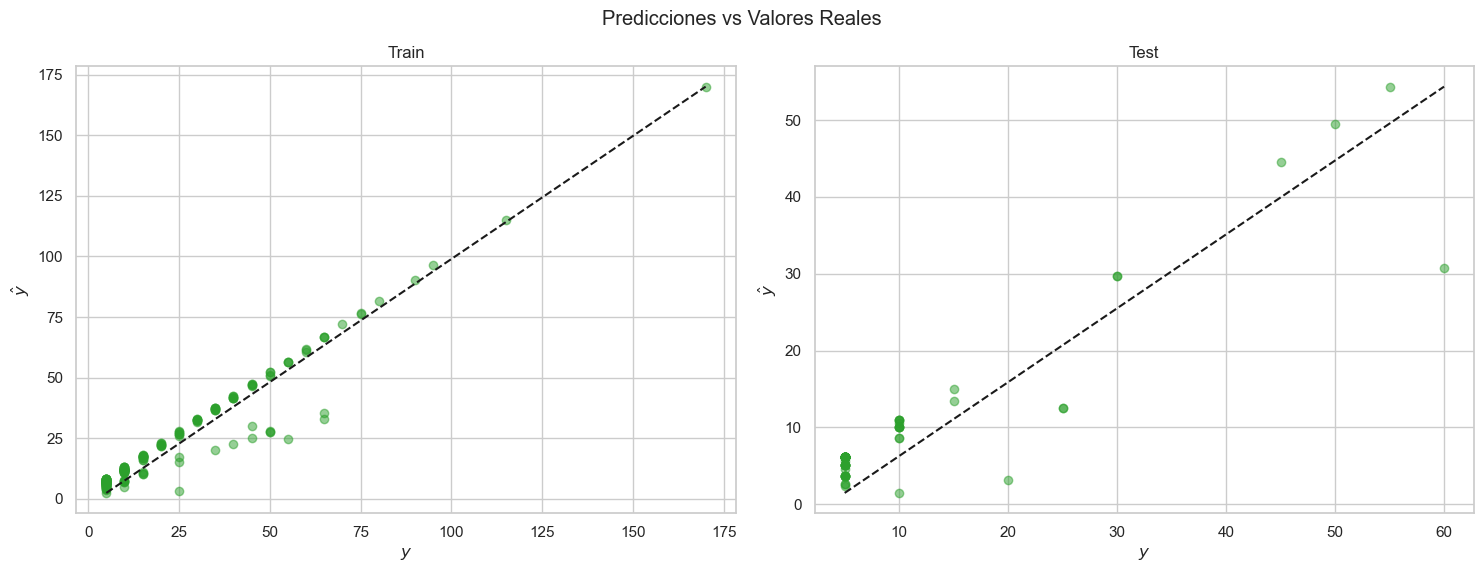

In [31]:
# plt.figure(figsize=(10, 6))
# plt.scatter(y_train, y_train_pred, c='tab:green', alpha=0.5)
# plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], '--k')
# plt.axis('tight')
# plt.xlabel('$y$')
# plt.ylabel('$\hat y$')
# plt.title('Predicciones vs Valores Reales (train)')

import warnings
warnings.filterwarnings('ignore', category=SyntaxWarning)
# warnings.resetwarnings()

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
#fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

axs[0].scatter(y_train, y_train_pred, c='tab:green', alpha=0.5)
axs[0].plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], '--k')
axs[0].set_title('Train')
axs[0].set_xlabel('$y$')
axs[0].set_ylabel('$\hat y$')

axs[1].scatter(y_test, y_test_pred, c='tab:green', alpha=0.5)
axs[1].plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], '--k')
axs[1].set_title('Test')
axs[1].set_xlabel('$y$')
axs[1].set_ylabel('$\hat y$')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #rect=[left, bottom, right, top]
fig.suptitle('Predicciones vs Valores Reales')

### Análisis de residuos

Text(0.5, 0.98, 'Gráfico de Residuos')

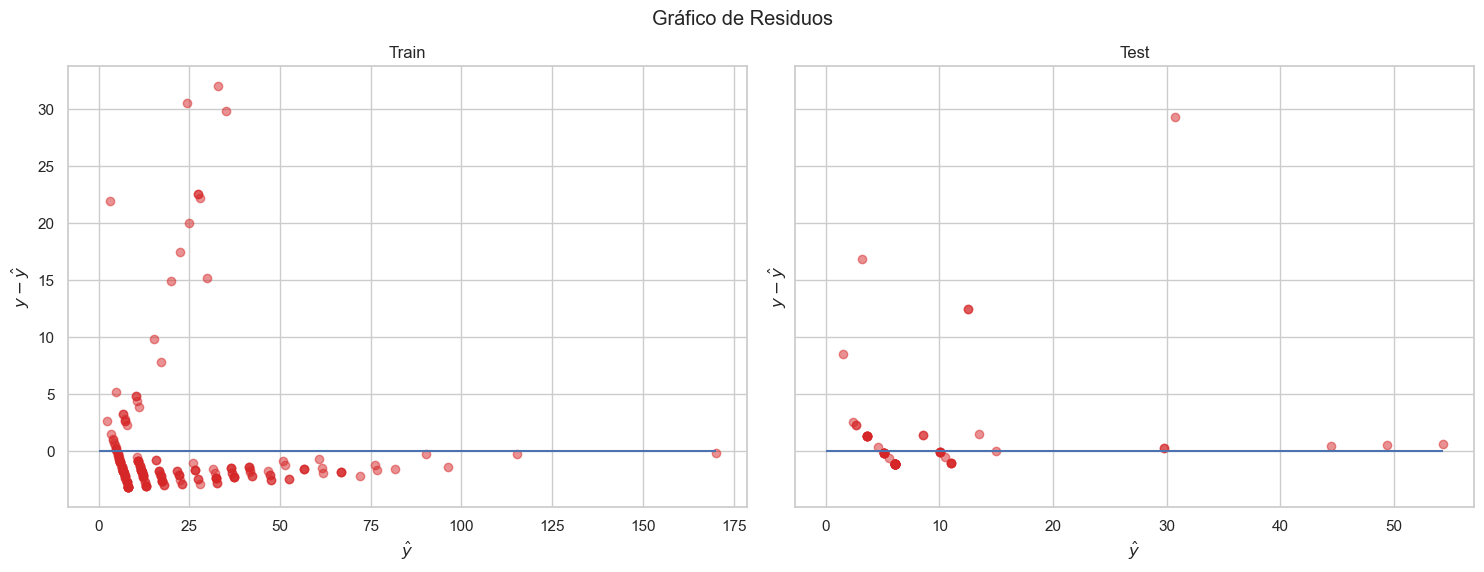

In [29]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=y_train_pred, y=y_train - y_train_pred, alpha=0.7)
# plt.hlines(y=0, xmin=0, xmax=y_train_pred.max())
# plt.title('Gráfico de residuos')
# plt.xlabel('$\hat y$')
# plt.ylabel('$y - \hat y$')

fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

axs[0].scatter(x=y_train_pred, y=y_train - y_train_pred, c='tab:red', alpha=0.5)
axs[0].hlines(y=0, xmin=0, xmax=y_train_pred.max())
axs[0].set_title('Train')
axs[0].set_xlabel('$\hat y$')
axs[0].set_ylabel('$y - \hat y$')

axs[1].scatter(x=y_test_pred, y=y_test - y_test_pred, c='tab:red', alpha=0.5)
axs[1].hlines(y=0, xmin=0, xmax=y_test_pred.max())
axs[1].set_title('Test')
axs[1].set_xlabel('$\hat y$')
axs[1].set_ylabel('$y - \hat y$')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #rect=[left, bottom, right, top]
fig.suptitle('Gráfico de Residuos')

### Coeficientes


Intercepto del modelo: 1.1775597834217386

Coeficientes del modelo de LinearRegression:
 [ 0.04922535 -0.97751192  0.40655189]

amount                      0.049225
fee_charge_moment_before   -0.977512
created_year_month_dummy    0.406552
dtype: float64


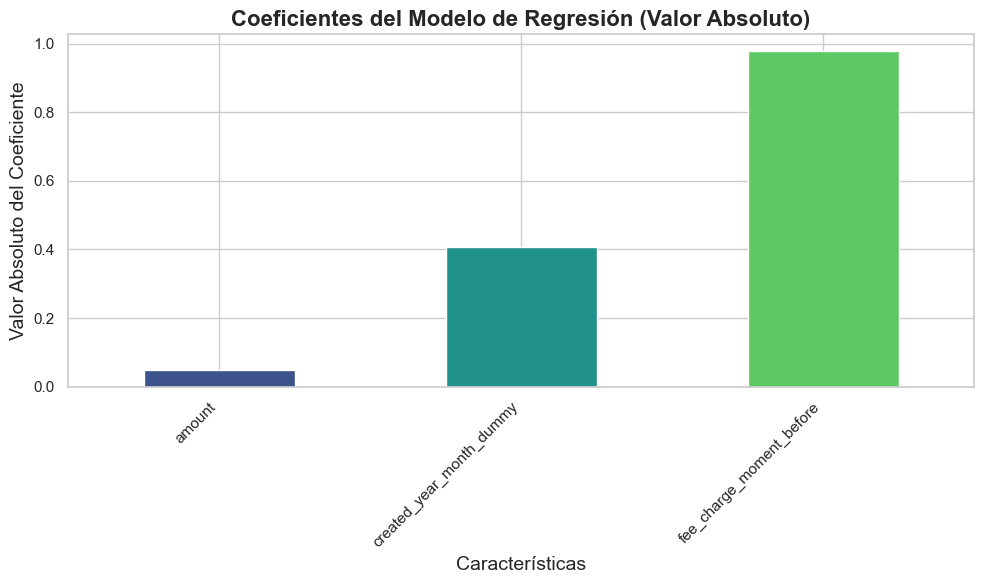

In [38]:
print('\nIntercepto del modelo:', model.intercept_)
print('\nCoeficientes del modelo de LinearRegression:\n', model.coef_)
print()

features = X.columns

print(pd.Series(model.coef_, index=features))

# Crear la gráfica de barras ordenada por valores absolutos de los coeficientes
plt.figure(figsize=(10, 6))

# Obtener los coeficientes de regresión
coefs_lr = pd.Series(np.abs(model.coef_), index=features).sort_values() # Valores absolutos para ordenarlos

# Ordenar los coeficientes de menor a mayor (invirtiendo el orden)
coefs_lr.sort_values(ascending=True).plot(kind='bar', color=sns.color_palette("viridis", n_colors=len(coefs_lr)))

# Título y etiquetas de ejes
plt.title('Coeficientes del Modelo de Regresión (Valor Absoluto)', fontsize=16, weight='bold')
plt.xlabel('Características', fontsize=14)
plt.ylabel('Valor Absoluto del Coeficiente', fontsize=14)

# Rotación y alineación de las etiquetas para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el espaciado para evitar solapamiento de elementos
plt.tight_layout()

# Mostrar la gráfica
plt.show()

### Regularización de Ridge


Intercepto del modelo: 1.1665598109447615

Coeficientes del modelo Ridge:
 [ 0.04923451 -0.95246386  0.40642352]

Error Cuadrático Medio (MSE) en entrenamiento: 34.362469120955396
Error Cuadrático Medio (MSE) en prueba: 21.41889826108771

Puntaje R^2 en entrenamiento: 0.9357564131706754
Puntaje R^2 en prueba: 0.8397535376489748


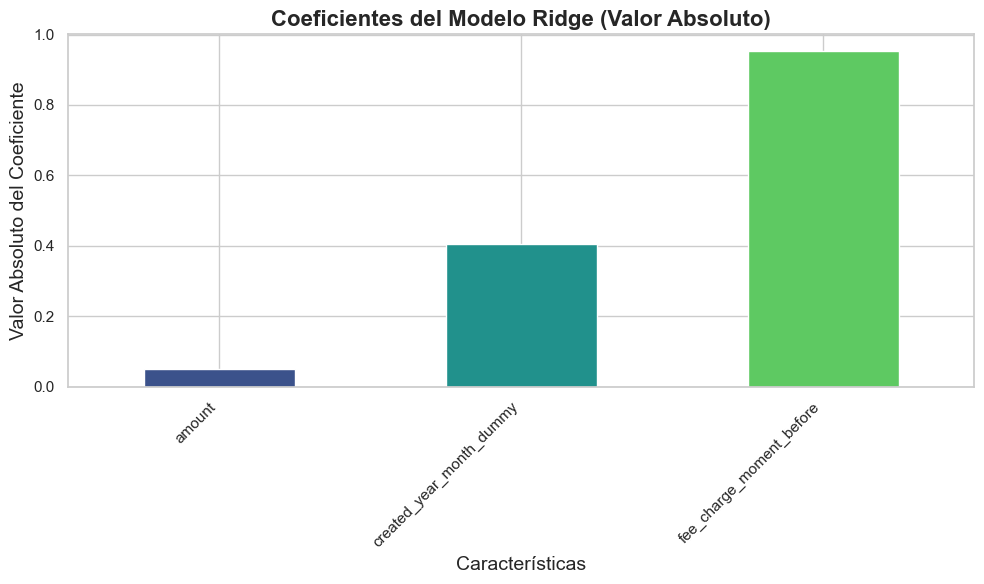

In [34]:
## Regresión Ridge
from sklearn import linear_model # Para la regresión Ridge
ridge = linear_model.Ridge(alpha=1) # Inicializamos el regresor Ridge con una penalización de 1
ridge.fit(X_train, y_train) # Ajustamos el modelo a los datos de entrenamiento

# Extraemos los coeficientes y los ordenamos en función de su valor absoluto
coefs_ridge = pd.Series(np.abs(ridge.coef_), index=features).sort_values(ascending=False)

# Realizamos la predicción en el conjunto de prueba y entrenamiento
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

# Evaluación del modelo: calculamos el Error Cuadrático Medio (MSE) y el R^2
mse_ridge_train = mean_squared_error(y_train, y_train_pred_ridge) # MSE en entrenamiento
mse_ridge_test = mean_squared_error(y_test, y_test_pred_ridge) # MSE en prueba
r2score_ridge_train = ridge.score(X_train, y_train) # R^2 en entrenamiento
r2score_ridge_test = ridge.score(X_test, y_test) # R^2 en prueba

# Mostramos los resultados:
print('\nIntercepto del modelo:', ridge.intercept_)
print('\nCoeficientes del modelo Ridge:\n', ridge.coef_)
print('\nError Cuadrático Medio (MSE) en entrenamiento:', mse_ridge_train)
print('Error Cuadrático Medio (MSE) en prueba:', mse_ridge_test)
print('\nPuntaje R^2 en entrenamiento:', r2score_ridge_train)
print('Puntaje R^2 en prueba:', r2score_ridge_test)

# Graficamos los coeficientes ordenados por valor absoluto
plt.figure(figsize=(10, 6))
# Ordenar los coeficientes de menor a mayor (invirtiendo el orden)
coefs_ridge.sort_values(ascending=True).plot(kind='bar', color=sns.color_palette("viridis", n_colors=len(coefs_ridge)))

# Añadimos el título y etiquetas a los ejes
plt.title('Coeficientes del Modelo Ridge (Valor Absoluto)', fontsize=16, weight='bold')
plt.xlabel('Características', fontsize=14)
plt.ylabel('Valor Absoluto del Coeficiente', fontsize=14)

# Ajustamos las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Ajuste del espaciado para evitar solapamientos
plt.tight_layout()

# Mostramos la gráfica con un diseño ajustado
plt.show()